# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = len(combined_data["Mouse ID"].unique())
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
dup_rows = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"])]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = dup_rows["Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined_data.loc[combined_data["Mouse ID"]=="g989",:]
duplicate_data



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_data = combined_data.drop_duplicates(["Mouse ID"], keep="first")
#clean_data
clean_data = combined_data[combined_data["Mouse ID"].isin(dup_mice)==False]
clean_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = len(clean_data["Mouse ID"].unique())
num_mice_clean

248

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_data = clean_data.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
sum_stats = grouped_data["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
# Assemble the resulting series into a single summary DataFrame.
sum_stats = sum_stats.rename(columns={
    "mean": "Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "var": "Tumor Volume Variance",
    "std": "Tumor Volume Std. Dev.",
    "sem": "Tumor Volume Std. Err."
})
sum_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
sum_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
sum_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

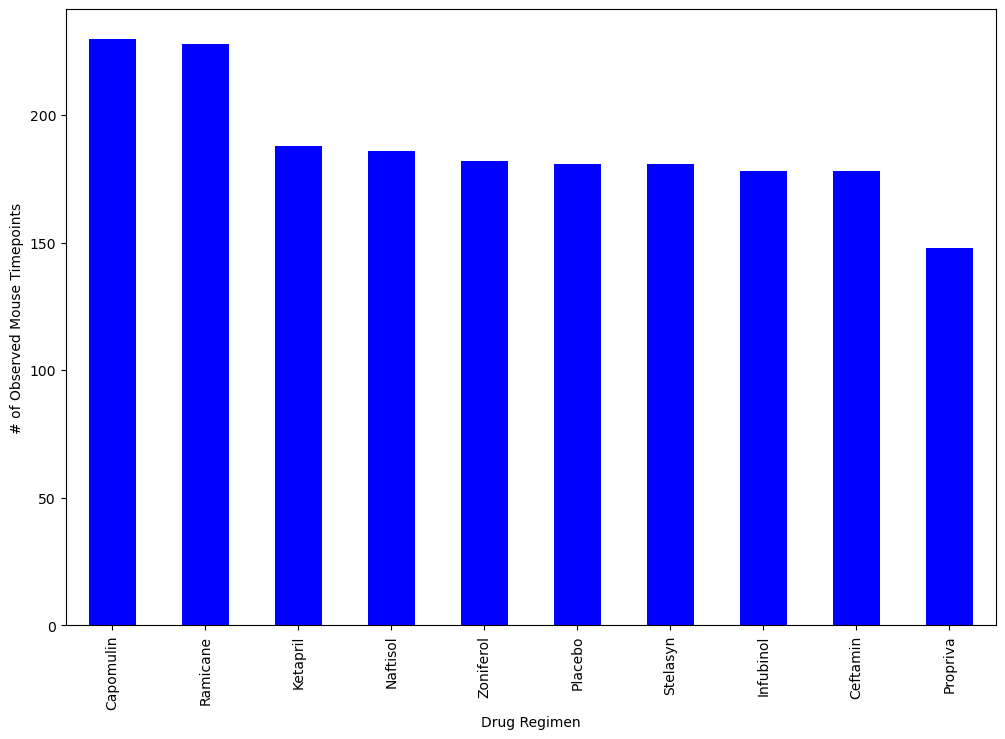

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
num_rows = clean_data["Drug Regimen"].value_counts()
num_rows.plot(kind='bar', figsize=(12, 8), color='blue')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

C:\Users\pku11\AppData\Local\Temp\ipykernel_20372\714402359.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplt.set_xticklabels(num_rows.index, rotation=90)


[Text(0, 0, 'Capomulin'),
 Text(1, 0, 'Ramicane'),
 Text(2, 0, 'Ketapril'),
 Text(3, 0, 'Naftisol'),
 Text(4, 0, 'Zoniferol'),
 Text(5, 0, 'Placebo'),
 Text(6, 0, 'Stelasyn'),
 Text(7, 0, 'Infubinol'),
 Text(8, 0, 'Ceftamin'),
 Text(9, 0, 'Propriva')]

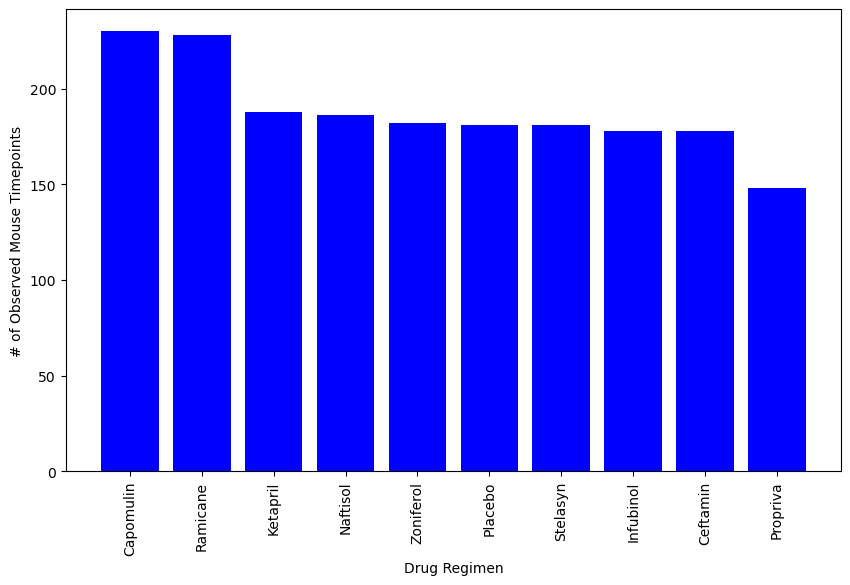

In [43]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
num_rows = clean_data["Drug Regimen"].value_counts()
fig, barplt = plt.subplots(figsize=(10, 6))
barplt.bar(num_rows.index, num_rows, color='blue')

barplt.set_xlabel("Drug Regimen")
barplt.set_ylabel("# of Observed Mouse Timepoints")
barplt.set_xticklabels(num_rows.index, rotation=90)


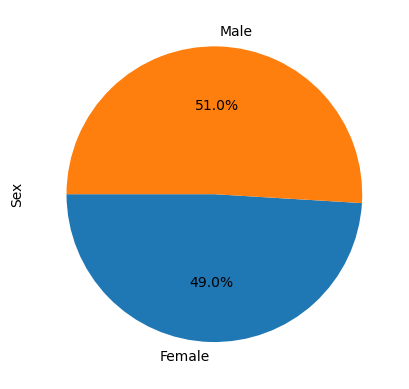

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_data.groupby(["Sex"])["Sex"].count()
plot_pie=sex.plot.pie(startangle=180, autopct="%1.1f%%")
plt.show()

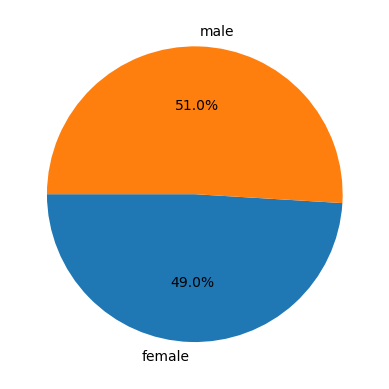

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex,labels=("female","male"),startangle=180, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [52]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_reg = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_data = clean_data[clean_data["Drug Regimen"].isin(treatment_reg)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint=clean_data.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
finaldf = pd.merge(filtered_data, last_timepoint, on=["Mouse ID","Timepoint"])
print(finaldf)


   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      k403     Ramicane    Male          21          16         45   
1      s185    Capomulin  Female           3          17         45   
2      x401    Capomulin  Female          16          15         45   
3      m601    Capomulin    Male          22          17         45   
4      g791     Ramicane    Male          11          16         45   
..      ...          ...     ...         ...         ...        ...   
95     x822     Ceftamin    Male           3          29         45   
96     y163    Infubinol  Female          17          27         45   
97     y769     Ceftamin  Female           6          27         45   
98     y865     Ceftamin    Male          23          26         45   
99     z581    Infubinol  Female          24          25         45   

    Tumor Volume (mm3)  Metastatic Sites  
0            22.050126                 1  
1            23.343598                 1  
2            28.48

In [57]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
for treatment in treatments:
    treatment_data = finaldf[finaldf["Drug Regimen"] == treatment]
    tumor_vol_data.append(treatment_data["Tumor Volume (mm3)"])

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = treatment_data["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
   
    # add subset 
   
    # Determine outliers using upper and lower bounds
    outliers = treatment_data[(treatment_data["Tumor Volume (mm3)"] < lower_bound) | (treatment_data["Tumor Volume (mm3)"] > upper_bound)]
    #print(outliers)
    print(f"{treatment}: {outliers}")

Capomulin: Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
Ramicane: Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
Infubinol:    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
58     c326    Infubinol  Female          18          25          5   

    Tumor Volume (mm3)  Metastatic Sites  
58           36.321346                 0  
Ceftamin: Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


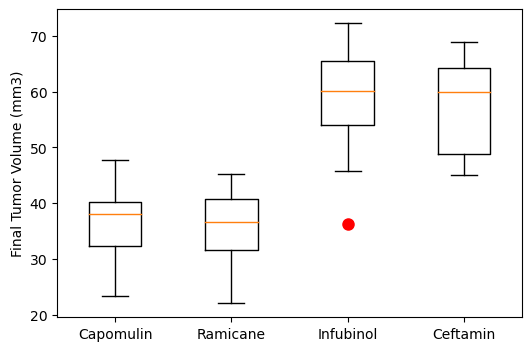

In [62]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(6, 4))
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(marker='o', markersize=8, markerfacecolor='r', markeredgecolor='r'))
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

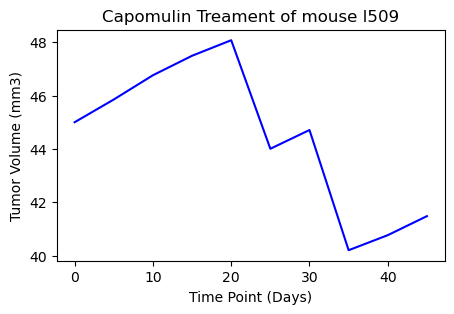

In [72]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
mouse = "l509"
mouse_data = capomulin[capomulin["Mouse ID"] == mouse]

plt.figure(figsize=(5, 3))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], color='blue')
plt.title(f"Capomulin Treament of mouse {mouse}")
plt.xlabel("Time Point (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()


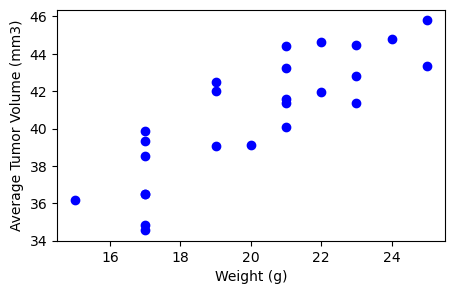

In [75]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


avg_tumor_vol = capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weight_avgtum = pd.merge(avg_tumor_vol, mouse_metadata, on="Mouse ID")

plt.figure(figsize=(5, 3))
plt.scatter(weight_avgtum["Weight (g)"], weight_avgtum["Tumor Volume (mm3)"], color='blue')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()



## Correlation and Regression

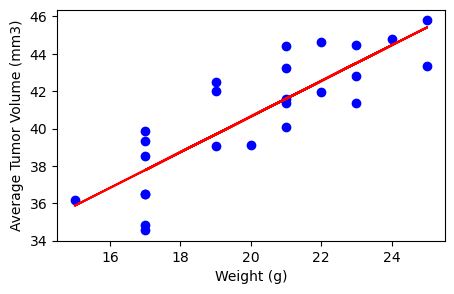

The correlation between mouse weight and the average tumor volume is  0.8419363424694722


In [78]:
# Calculate the correlation coefficient and a linear regression model 
corr_coef = weight_avgtum["Weight (g)"].corr(weight_avgtum["Tumor Volume (mm3)"])
#Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(weight_avgtum["Weight (g)"], weight_avgtum["Tumor Volume (mm3)"])
line = slope * weight_avgtum["Weight (g)"] + intercept
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.figure(figsize=(5, 3))
plt.scatter(weight_avgtum["Weight (g)"], weight_avgtum["Tumor Volume (mm3)"], color='blue')
plt.plot(weight_avgtum["Weight (g)"], line, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

print("The correlation between mouse weight and the average tumor volume is ", corr_coef)
